# CMR Multi-Parameter Sweep

**Mandatory behavioral readouts** (produced for every sweep):
recall accuracy, SPC, PFR, lag-CRP, conditional forward & backward lag rates, unconditional |ℓ| summaries.

**Parameter-specific internal diagnostics** per sweep.

---
## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.filterwarnings('ignore')

# ── CMR package ──────────────────────────────────────────────────
from cmr.config import (
    N, BASE_PARAMS,
    B_rec_grid, gamma_fc_grid, eta_grid, B_encD_scale_grid,
    n_sims,
)
from cmr.sweep import sweep_one_param
from cmr.metrics import recall_accuracy

# Recall-stage diagnostics
from cmr.diagnostics_recall import (
    get_trace_sims, mean_curve_over_sims,
    item_evidence_asymmetry_means, fc_alignment_asymmetry_means,
)

# Encoding-stage diagnostics
from cmr.diagnostics_encoding import (
    sweep_matrix_norms, sweep_band_profiles,
    sweep_neighbor_band_asymmetry, sweep_recall_counts,
)

# Visualization
from cmr.visualization import (
    make_sweep_colors,
    # mandatory behavioral
    plot_all_behavioral_readouts,
    # recall-stage
    plot_item_evidence_asymmetry_paired,
    plot_fc_alignment_asymmetry_sweep,
    plot_fc_alignment_asymmetry_curves,
    plot_cosine_similarity_sweep,
    plot_mean_evidence_by_pos,
    plot_lag_crp_diagnostics,
    plot_scalar_metric_vs_param,
    # encoding-stage
    plot_matrix_band_profiles,
    plot_matrix_norms_sweep,
    plot_neighbor_band_asymmetry_sweep,
)

### Configuration

All defaults live in `cmr/config.py`.  Override below before running.

In [2]:
# Uncomment to override:
# BASE_PARAMS["B_rec"] = 0.55
# n_sims = 500

---
# Run Sweeps

## 1. Sweep retrieval context drift  $B_{rec}$

In [3]:
sweep_B_rec = sweep_one_param(
    param_name="B_rec",
    param_grid=B_rec_grid,
    base_params=BASE_PARAMS,
    n_sims=n_sims,
    collect_diagnostics=True,
    recency_k=3,
)

  B_rec=0.2  done
  B_rec=0.4  done
  B_rec=0.6  done
  B_rec=0.8  done
  B_rec=1  done
  B_rec=1.2  done


### Mandatory Behavioral Readouts

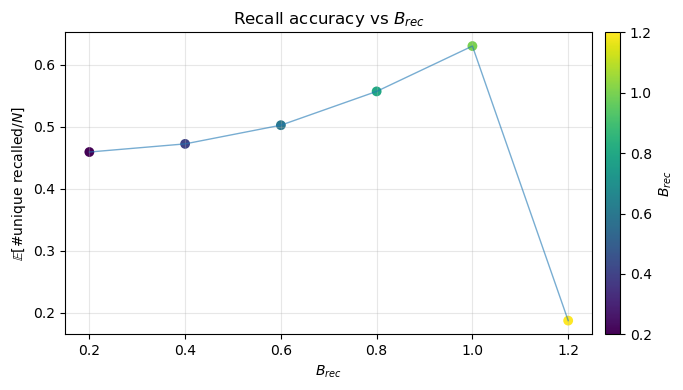

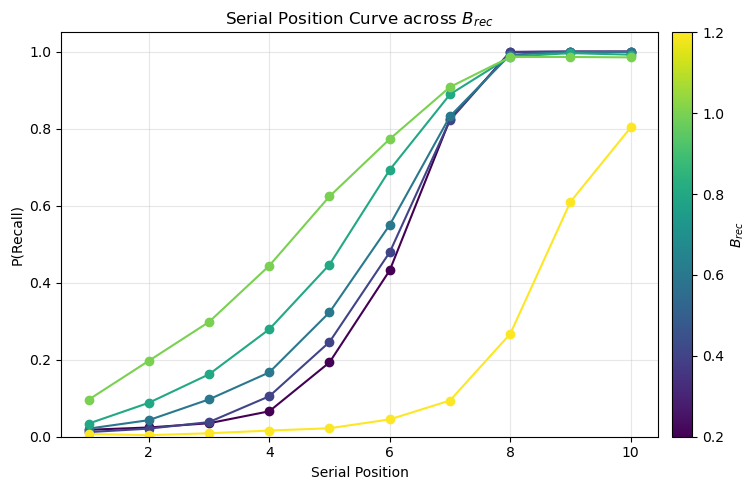

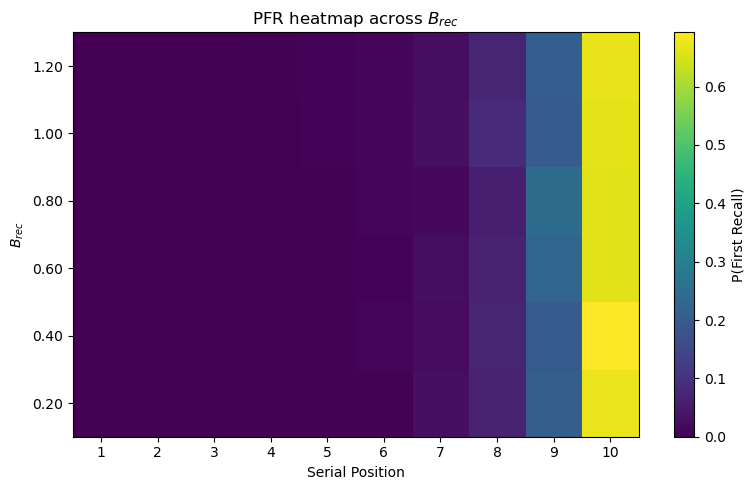

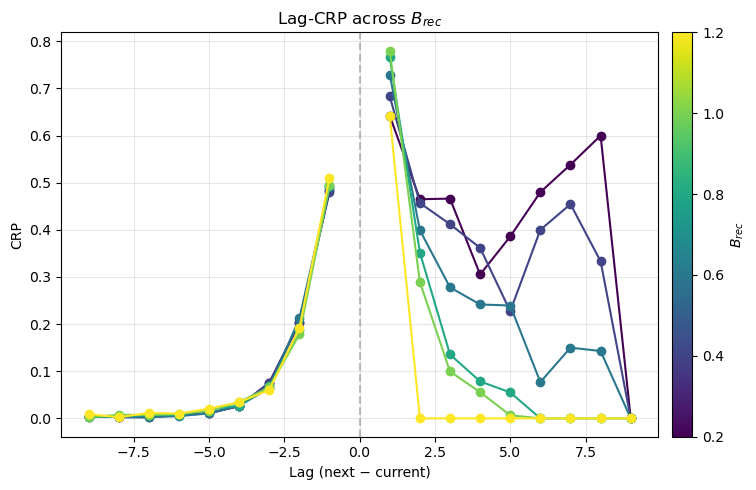

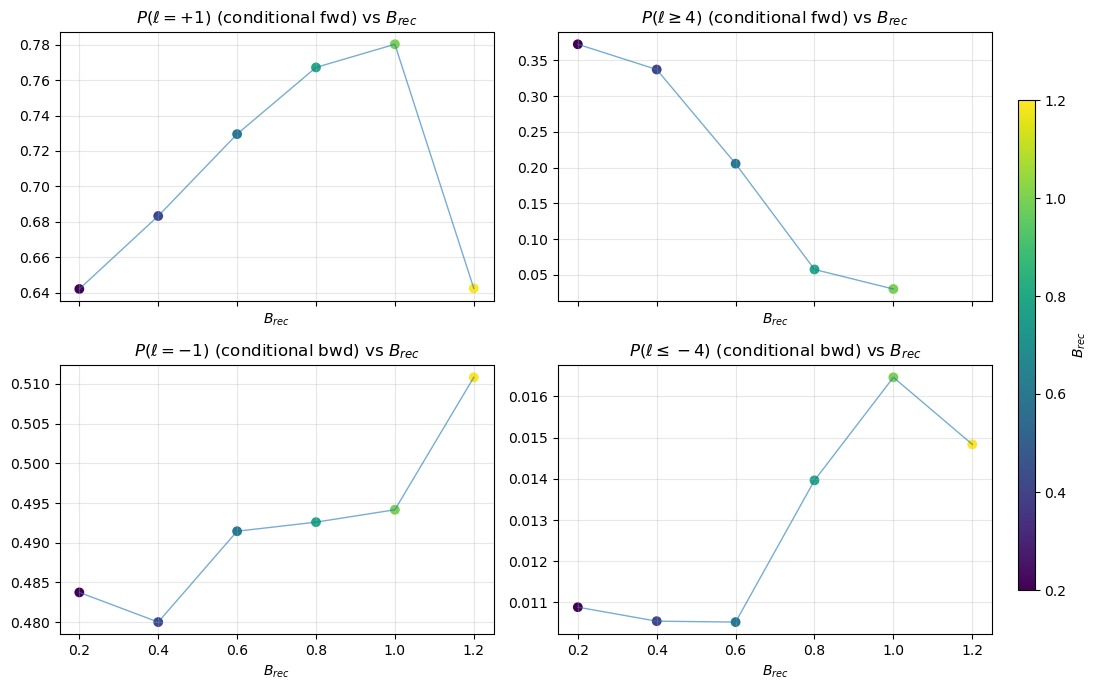

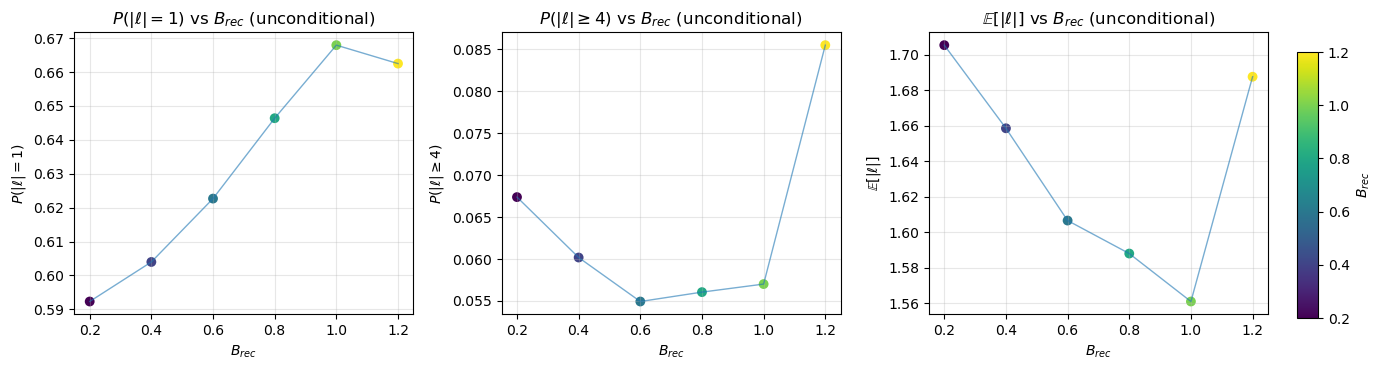

In [4]:
plot_all_behavioral_readouts(sweep_B_rec, B_rec_grid, r"$B_{rec}$")

### Model Internal Diagnostics ($B_{rec}$)

Retrieval context update strength — most informative internals are
context-update sanity (radicand, norm, cos), evidence profiles,
and neighbor asymmetries.

#### Radicand $\mathrm{rad}(t)$ across retrieval steps

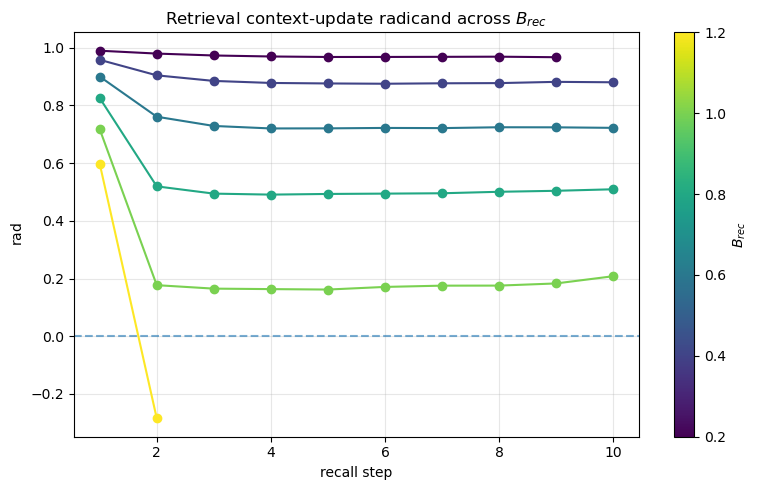

In [5]:
param_grid = np.asarray(B_rec_grid, dtype=float)
colors, norm, cmap = make_sweep_colors(param_grid, cmap_name="viridis")

plt.figure(figsize=(8, 5))
for B, color in zip(param_grid, colors):
    trace_sims = get_trace_sims(sweep_B_rec, B)
    x, rad_mean = mean_curve_over_sims(trace_sims, "rad")
    if x.size:
        plt.plot(x, rad_mean, marker="o", color=color)

plt.axhline(0, linestyle="--", alpha=0.6)
plt.title(r"Retrieval context-update radicand across $B_{rec}$")
plt.xlabel("recall step"); plt.ylabel(r"$\mathrm{rad}$")
plt.grid(alpha=0.3); plt.tight_layout()
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
plt.gcf().colorbar(sm, ax=plt.gca()).set_label(r"$B_{rec}$")
plt.show()

#### Context norm $\|c\|$ after each retrieval update

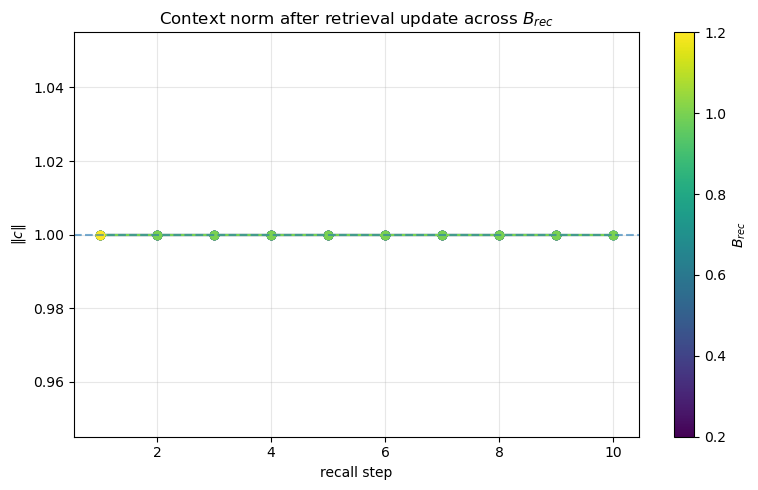

In [6]:
colors, norm, cmap = make_sweep_colors(param_grid, cmap_name="viridis")

plt.figure(figsize=(8, 5))
for B, color in zip(param_grid, colors):
    trace_sims = get_trace_sims(sweep_B_rec, B)
    x, cn_mean = mean_curve_over_sims(trace_sims, "c_norm")
    if x.size:
        plt.plot(x, cn_mean, marker="o", color=color)

plt.axhline(1, linestyle="--", alpha=0.6)
plt.title(r"Context norm after retrieval update across $B_{rec}$")
plt.xlabel("recall step"); plt.ylabel(r"$\|c\|$")
plt.grid(alpha=0.3); plt.tight_layout()
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
plt.gcf().colorbar(sm, ax=plt.gca()).set_label(r"$B_{rec}$")
plt.show()

#### Cosine similarity $\cos(c, c_{in})$ after update

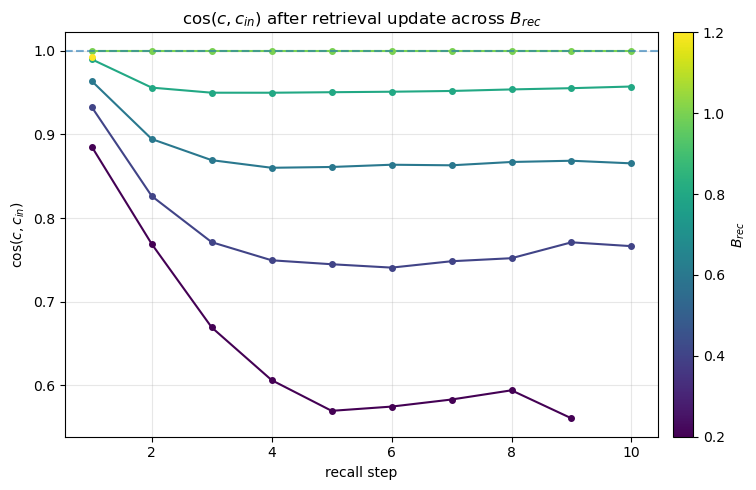

In [7]:
plot_cosine_similarity_sweep(sweep_B_rec, B_rec_grid, param_name=r"$B_{rec}$")

#### Mean evidence $f_{in}(i)$ by serial position

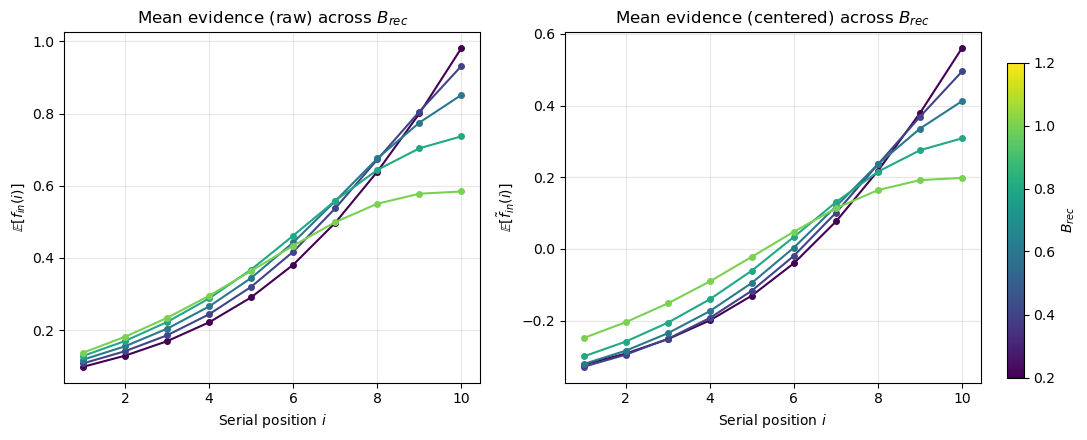

In [8]:
plot_mean_evidence_by_pos(sweep_B_rec, B_rec_grid, param_name=r"$B_{rec}$")

#### Neighbor item-evidence asymmetry during selection

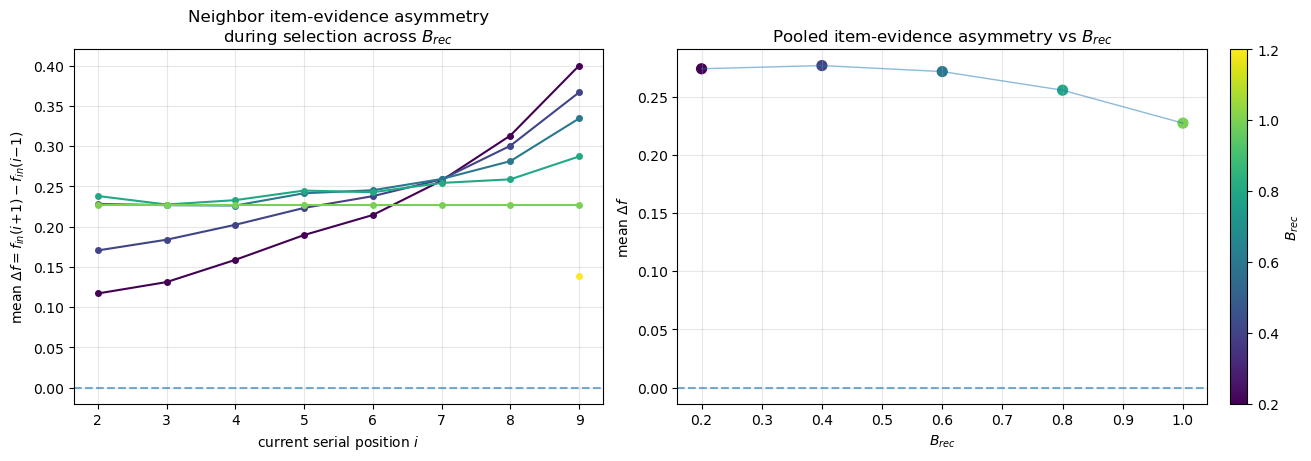

In [9]:
plot_item_evidence_asymmetry_paired(sweep_B_rec, B_rec_grid, param_name=r"$B_{rec}$")

#### Neighbor context-to-item-input alignment ($\Delta_{FC}$) asymmetry during updating

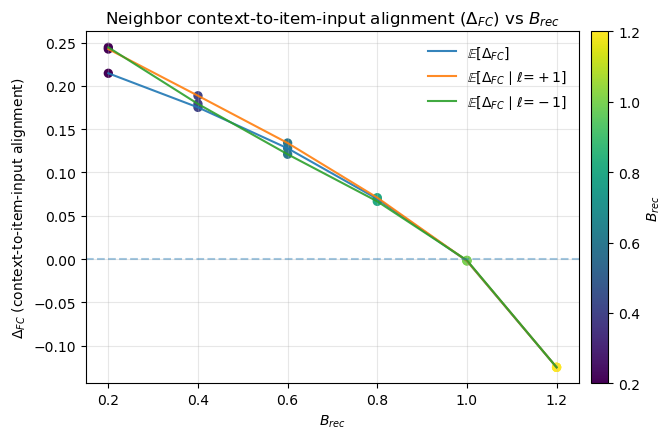

In [10]:
plot_fc_alignment_asymmetry_sweep(sweep_B_rec, B_rec_grid, param_name=r"$B_{rec}$")

#### lag-CRP diagnostics (numerator & denominator)

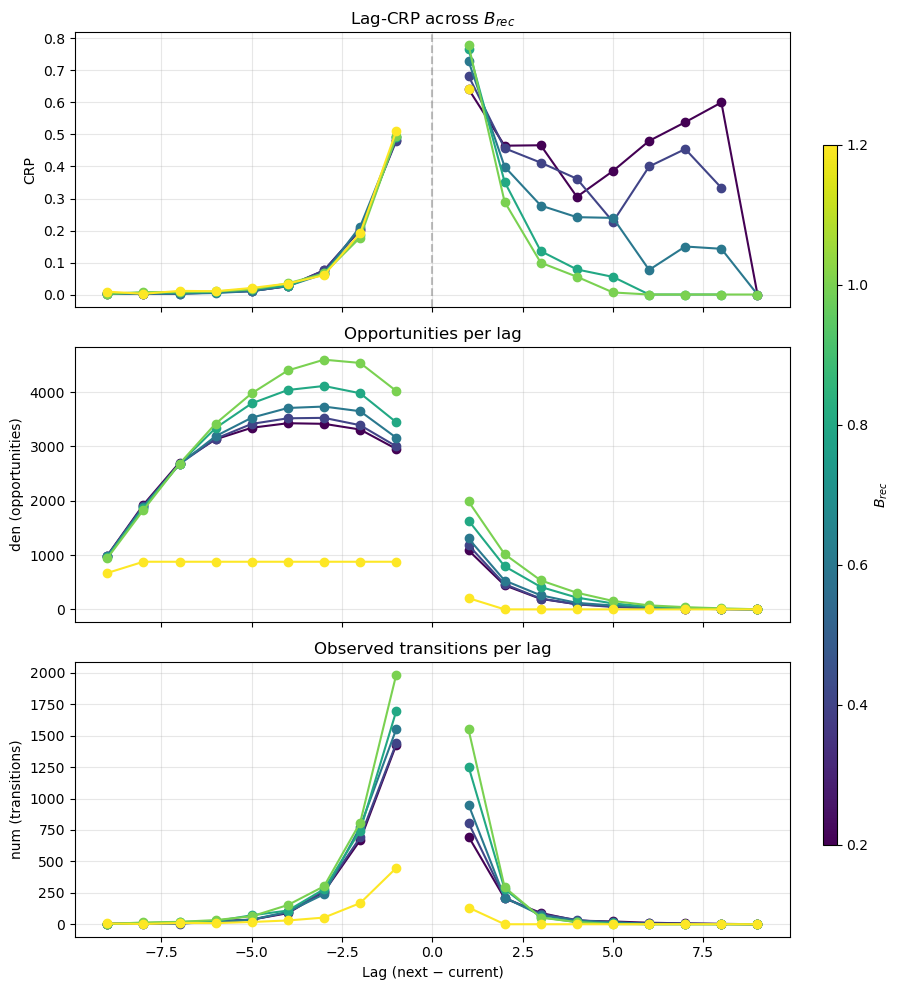

In [11]:
plot_lag_crp_diagnostics(sweep_B_rec, B_rec_grid, param_name=r"$B_{rec}$")

---
## 2. Sweep feature-to-context association strength $\gamma_{fc}$

In [12]:
sweep_gamma_fc = sweep_one_param(
    param_name="gamma_fc",
    param_grid=gamma_fc_grid,
    base_params=BASE_PARAMS,
    n_sims=n_sims,
    collect_diagnostics=True,
    recency_k=3,
)

  gamma_fc=0.2  done
  gamma_fc=0.3  done
  gamma_fc=0.4  done
  gamma_fc=0.5  done
  gamma_fc=0.6  done
  gamma_fc=0.7  done
  gamma_fc=0.8  done


### Behavioral Readouts

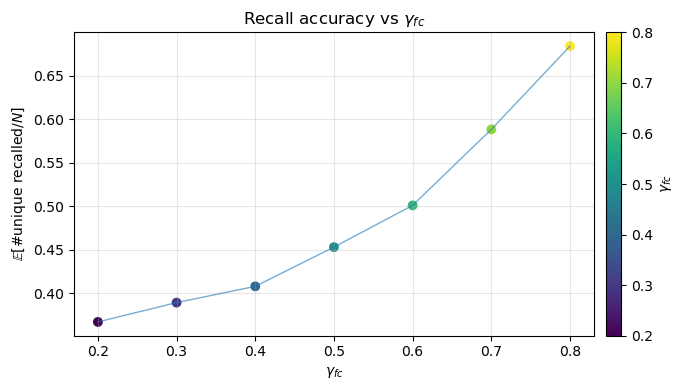

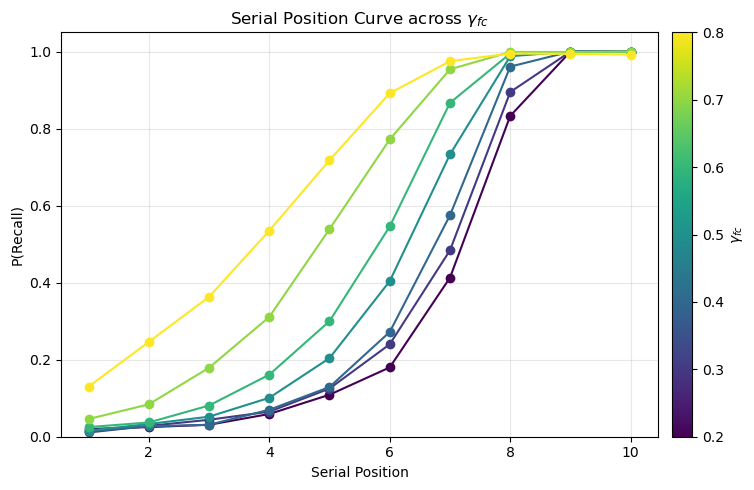

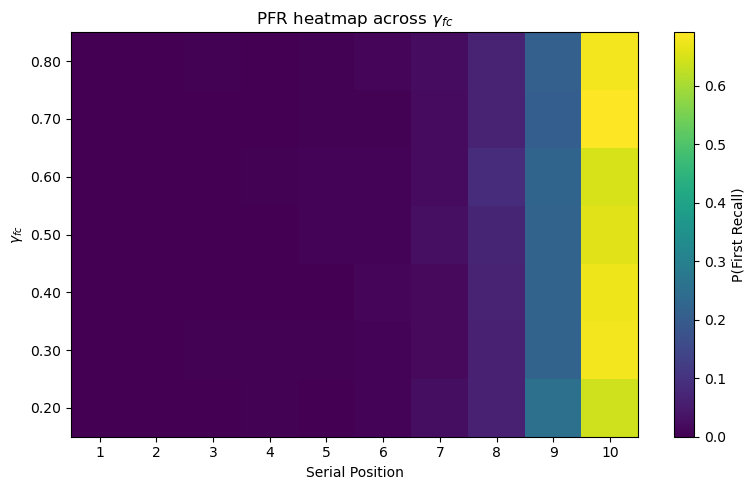

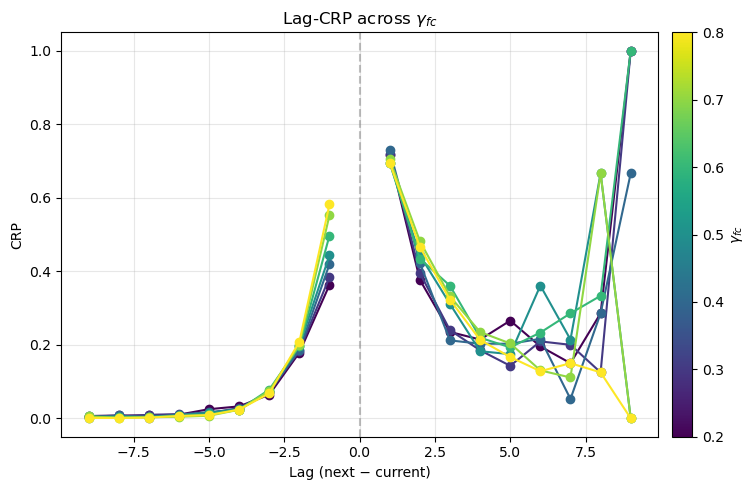

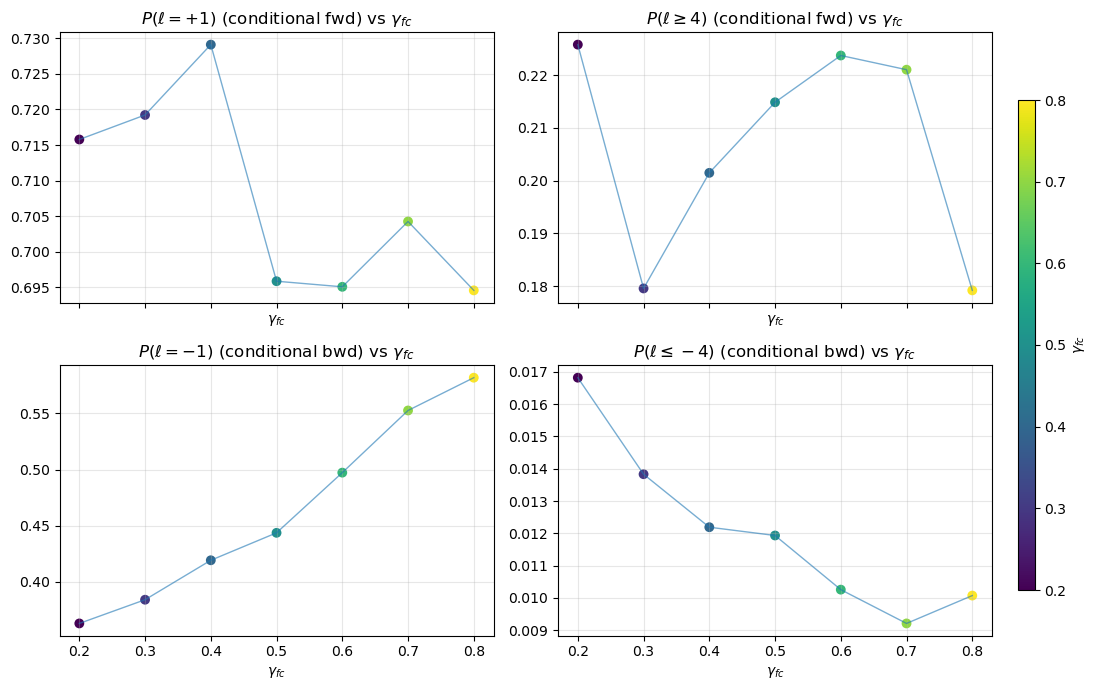

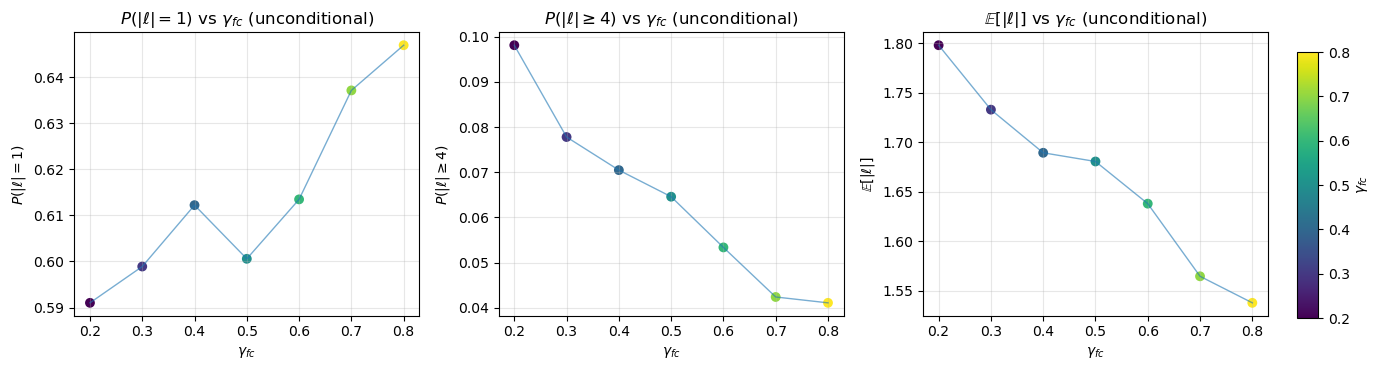

In [13]:
plot_all_behavioral_readouts(sweep_gamma_fc, gamma_fc_grid, r"$\gamma_{fc}$")

### Model Internal Diagnostics ($\gamma_{fc}$)

FC learning rate — most informative internals are learned $M_{FC}$ structure,
item-evidence asymmetry, lag-CRP numerator/denominator, and evidence profiles.

#### $M_{FC}$ band-strength profile

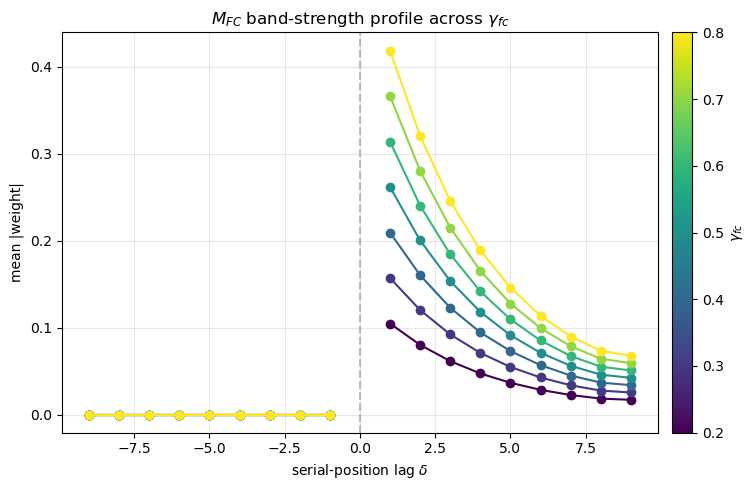

In [14]:
plot_matrix_band_profiles(sweep_gamma_fc, gamma_fc_grid, r"$\gamma_{fc}$", matrix_key="net_w_fc")

#### $M_{FC}$ norms

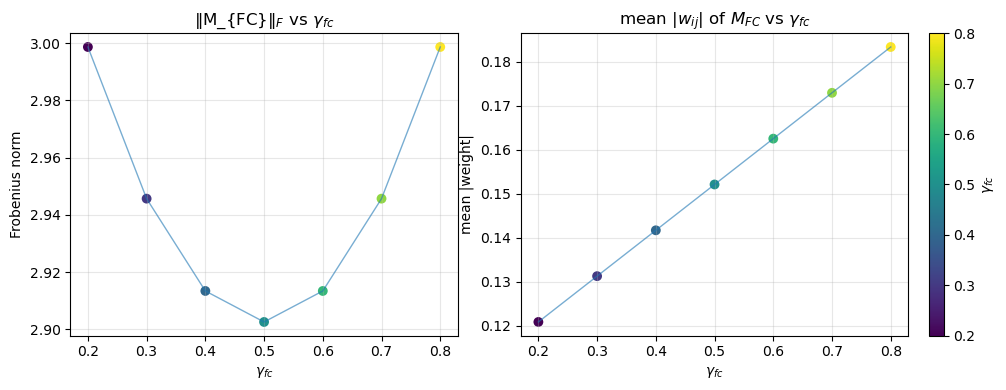

In [15]:
plot_matrix_norms_sweep(sweep_gamma_fc, gamma_fc_grid, r"$\gamma_{fc}$", matrix_key="net_w_fc")

#### $M_{FC}$ neighbor-band asymmetry

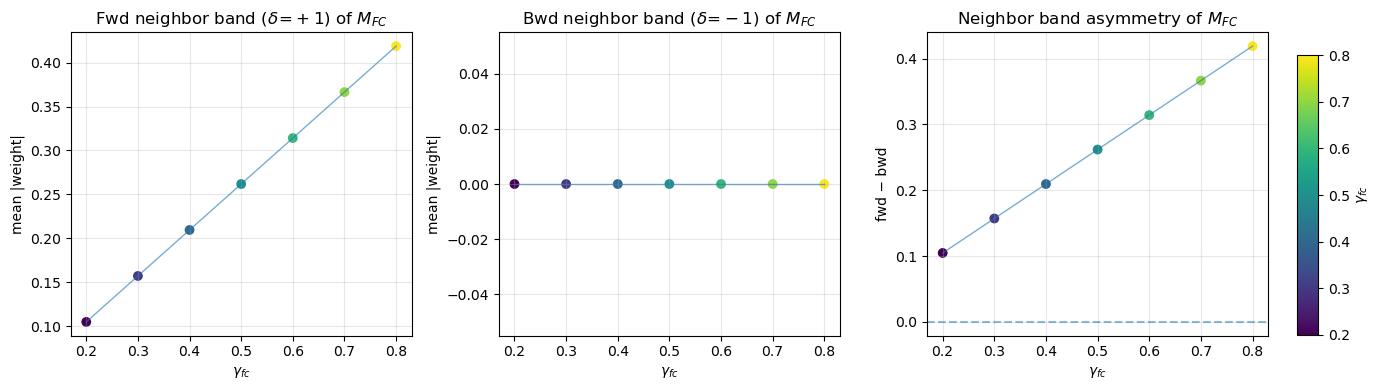

In [16]:
plot_neighbor_band_asymmetry_sweep(sweep_gamma_fc, gamma_fc_grid, r"$\gamma_{fc}$", matrix_key="net_w_fc")

#### Neighbor item-evidence asymmetry during selection

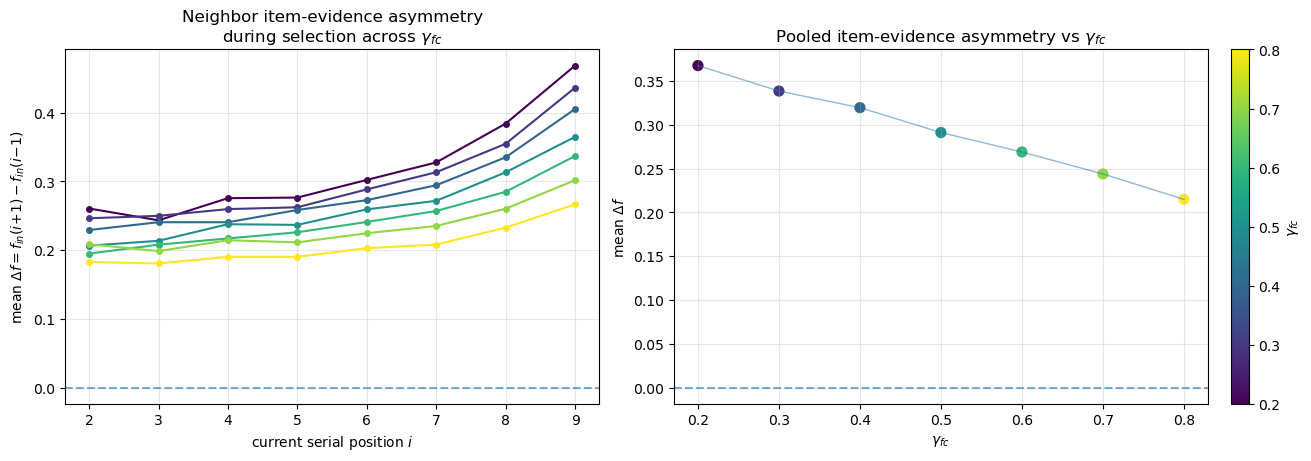

In [17]:
plot_item_evidence_asymmetry_paired(sweep_gamma_fc, gamma_fc_grid, param_name=r"$\gamma_{fc}$")

#### Neighbor context-to-item-input alignment ($\Delta_{FC}$) asymmetry during updating

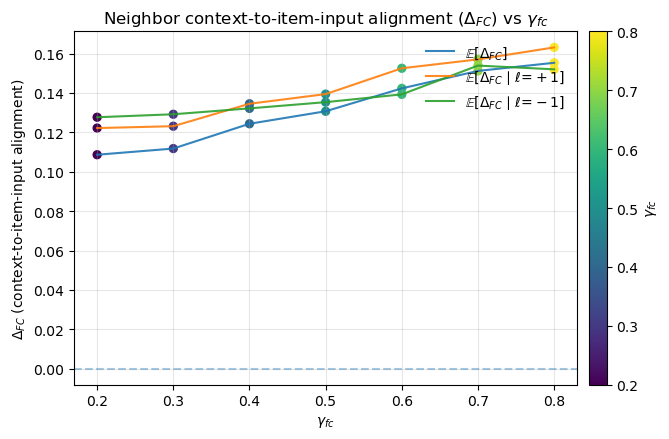

In [18]:
plot_fc_alignment_asymmetry_sweep(sweep_gamma_fc, gamma_fc_grid, param_name=r"$\gamma_{fc}$")

#### $\Delta_{FC}$ side-by-side: $\gamma_{fc}$ and $B_{rec}$

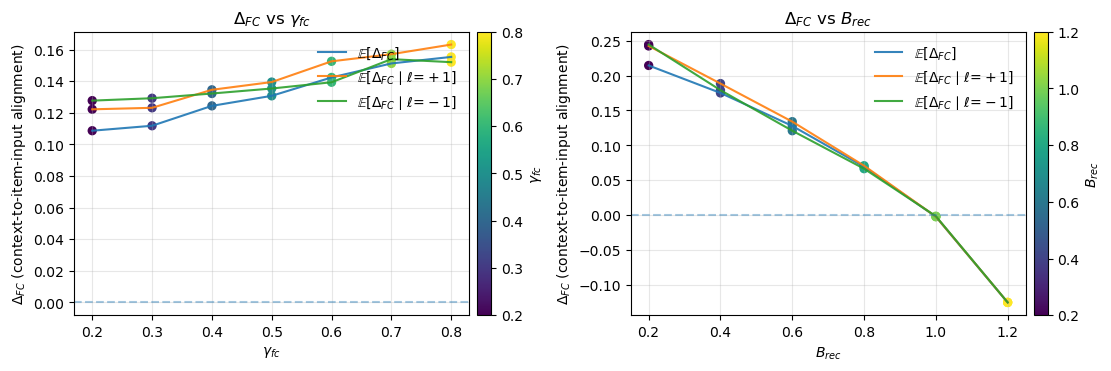

In [19]:
# Extract means
m_all_g, m_fwd_g, m_bwd_g = fc_alignment_asymmetry_means(sweep_gamma_fc, gamma_fc_grid)
m_all_b, m_fwd_b, m_bwd_b = fc_alignment_asymmetry_means(sweep_B_rec, B_rec_grid)

gc, gn, gm = make_sweep_colors(gamma_fc_grid, "viridis")
bc, bn, bm = make_sweep_colors(B_rec_grid, "viridis")

fig, axs = plt.subplots(1, 2, figsize=(11, 3.6), constrained_layout=True)
plot_fc_alignment_asymmetry_curves(
    axs[0], gamma_fc_grid, m_all_g, m_fwd_g, m_bwd_g, gc,
    title=r"$\Delta_{FC}$ vs $\gamma_{fc}$", xlabel=r"$\gamma_{fc}$")
plot_fc_alignment_asymmetry_curves(
    axs[1], B_rec_grid, m_all_b, m_fwd_b, m_bwd_b, bc,
    title=r"$\Delta_{FC}$ vs $B_{rec}$", xlabel=r"$B_{rec}$")

sm0 = mpl.cm.ScalarMappable(norm=gn, cmap=gm); sm0.set_array([])
sm1 = mpl.cm.ScalarMappable(norm=bn, cmap=bm); sm1.set_array([])
fig.colorbar(sm0, ax=axs[0], pad=0.02).set_label(r"$\gamma_{fc}$")
fig.colorbar(sm1, ax=axs[1], pad=0.02).set_label(r"$B_{rec}$")
plt.show()

#### Mean $f_{in}(i)$ by serial position

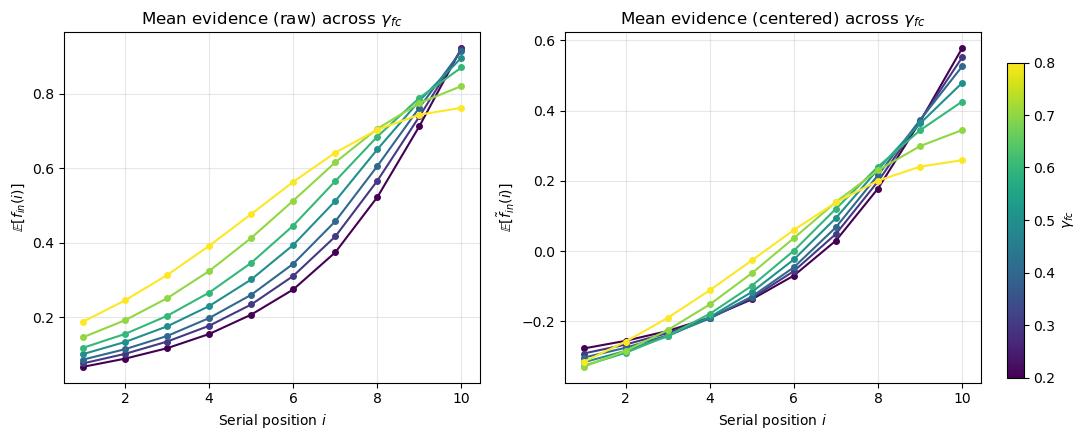

In [20]:
plot_mean_evidence_by_pos(sweep_gamma_fc, gamma_fc_grid, param_name=r"$\gamma_{fc}$")

#### lag-CRP diagnostics (numerator & denominator)

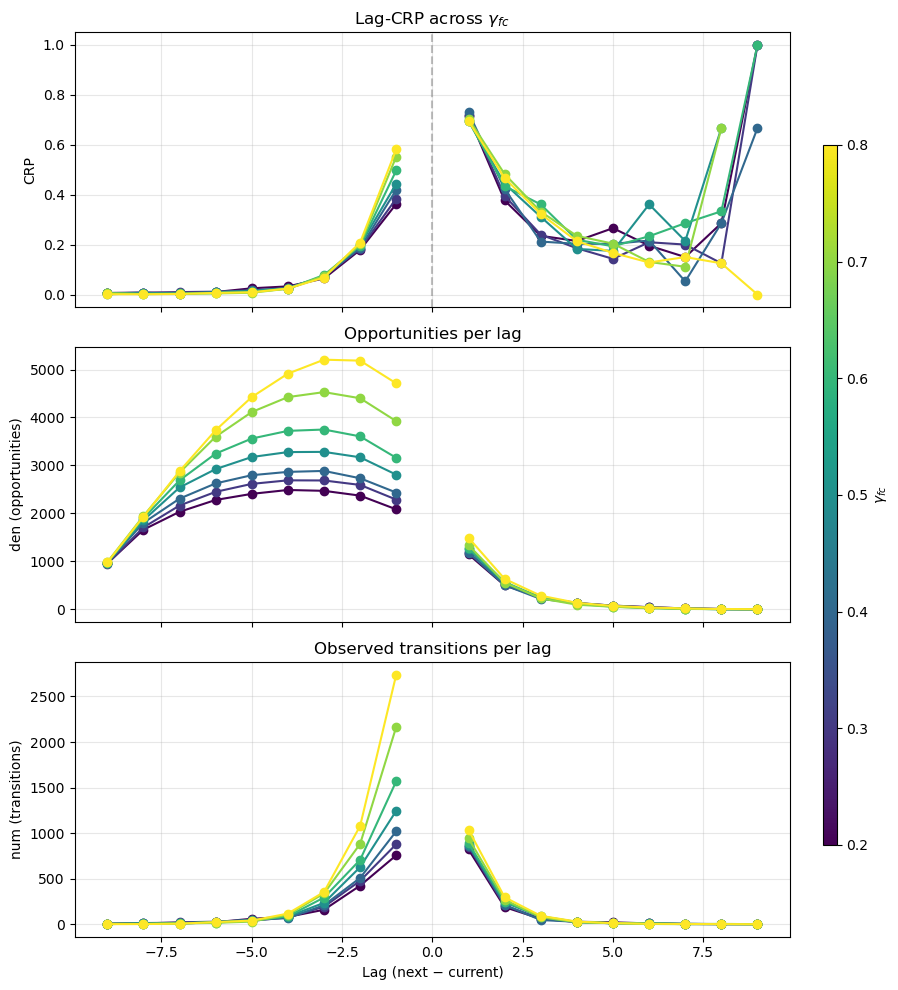

In [21]:
plot_lag_crp_diagnostics(sweep_gamma_fc, gamma_fc_grid, param_name=r"$\gamma_{fc}$")

#### Cosine similarity $\cos(c, c_{in})$ after update

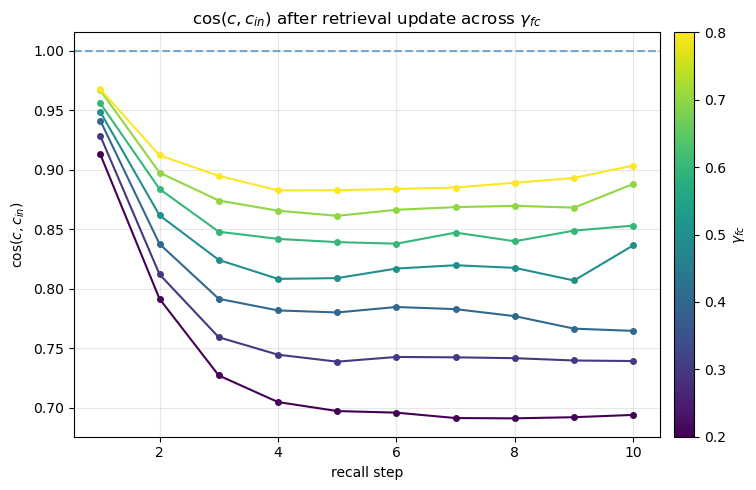

In [22]:
plot_cosine_similarity_sweep(sweep_gamma_fc, gamma_fc_grid, param_name=r"$\gamma_{fc}$")

---
## 3. Sweep accumulator noise $\eta$

In [23]:
sweep_eta = sweep_one_param(
    param_name="eta",
    param_grid=eta_grid,
    base_params=BASE_PARAMS,
    n_sims=n_sims,
    collect_diagnostics=True,
    recency_k=3,
)

  eta=0.1  done
  eta=0.2  done
  eta=0.3  done
  eta=0.4  done
  eta=0.5  done
  eta=0.6  done


### Behavioral Readouts

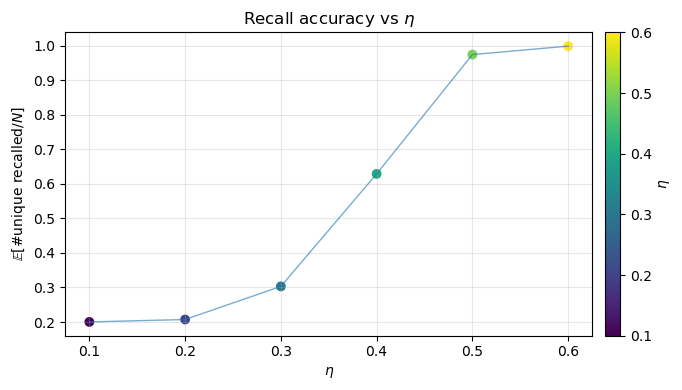

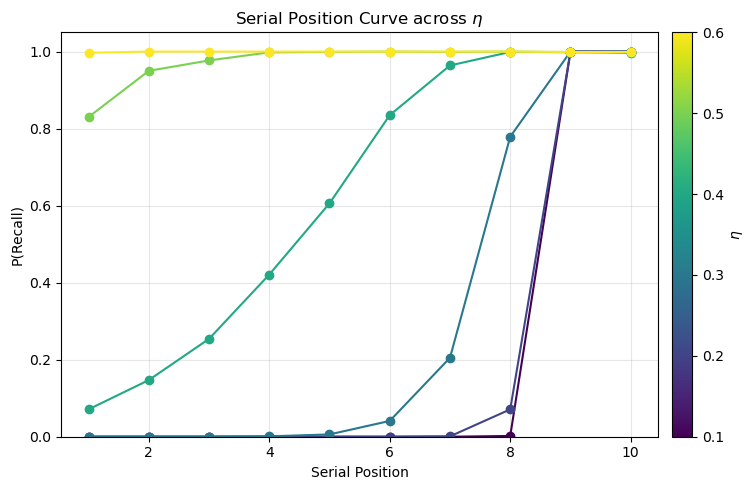

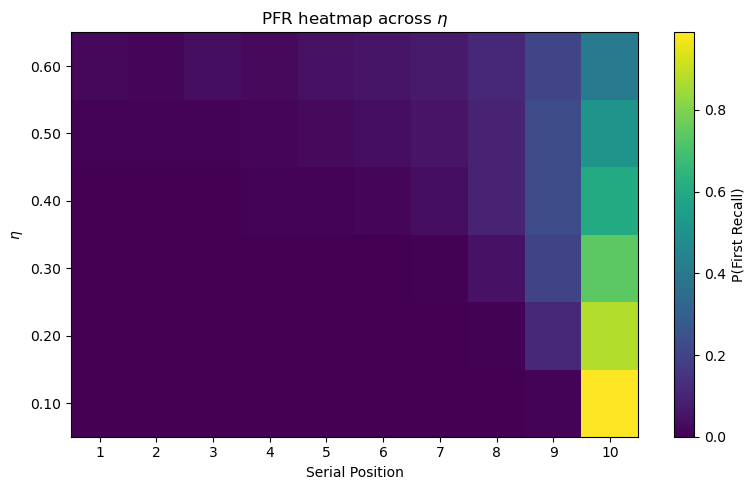

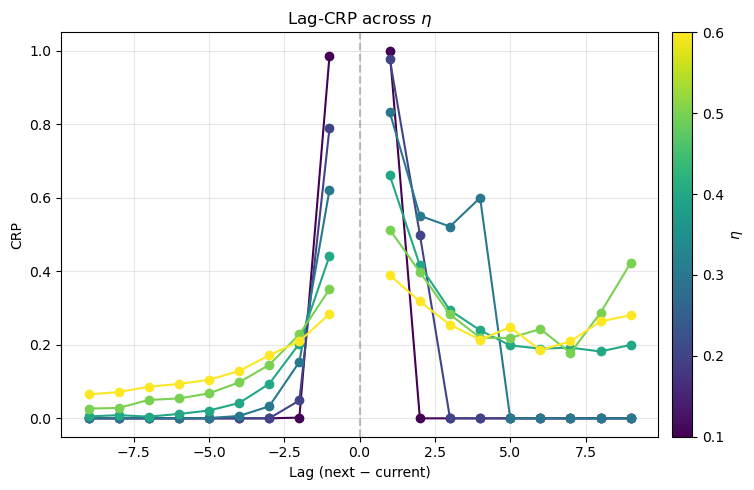

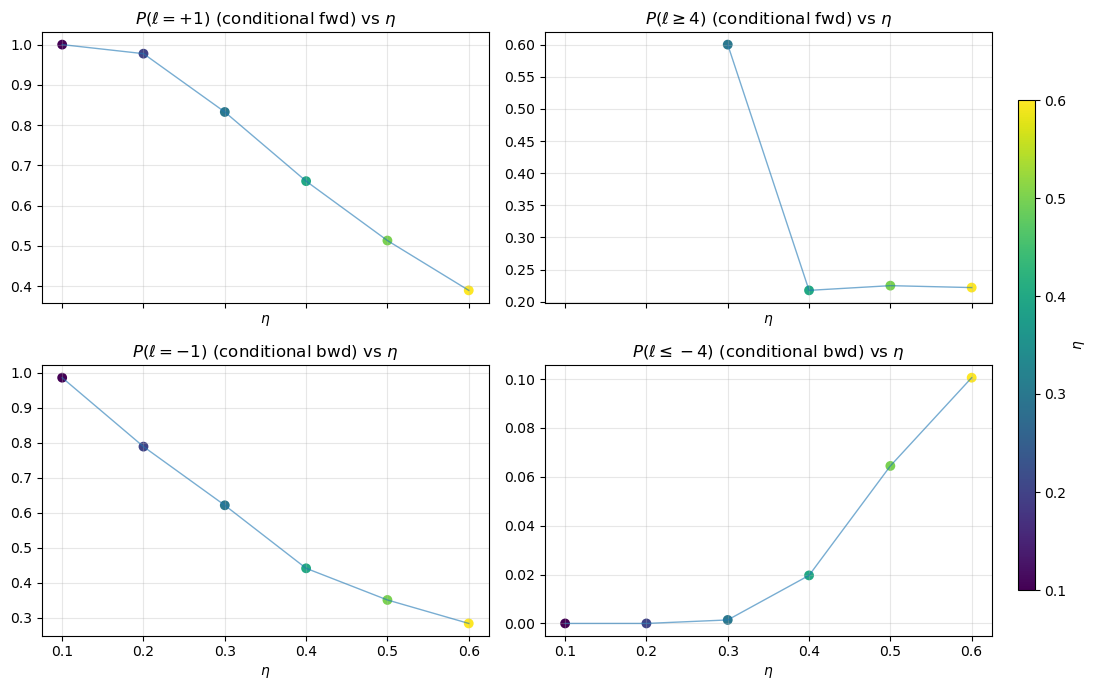

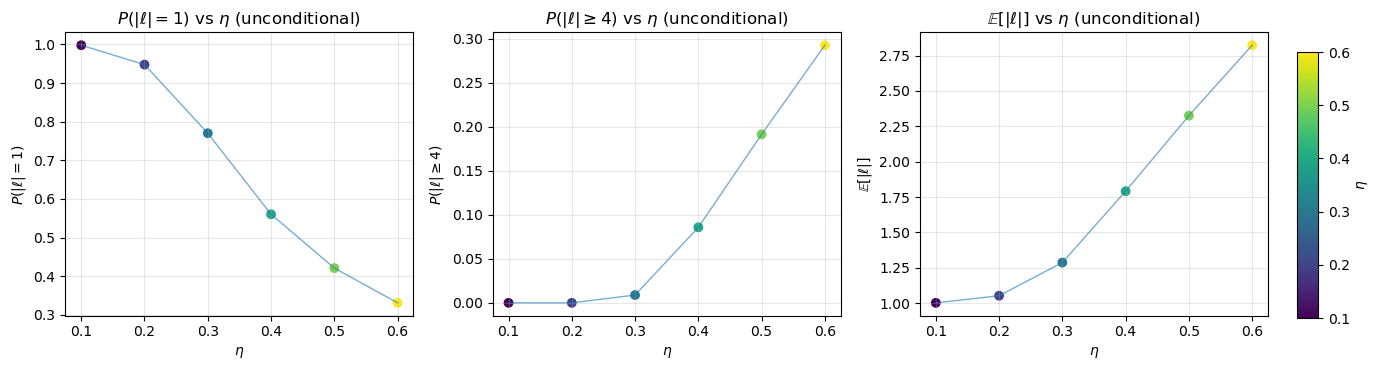

In [24]:
plot_all_behavioral_readouts(sweep_eta, eta_grid, r"$\eta$")

### Model Internal Diagnostics ($\eta$)

Accumulator noise — most informative internals are evidence entropy/recency mass
(which should be stable if $\eta$ only affects competition, not evidence),
evidence-by-position profiles, and asymmetries.

#### Cosine similarity $\cos(c, c_{in})$ after update

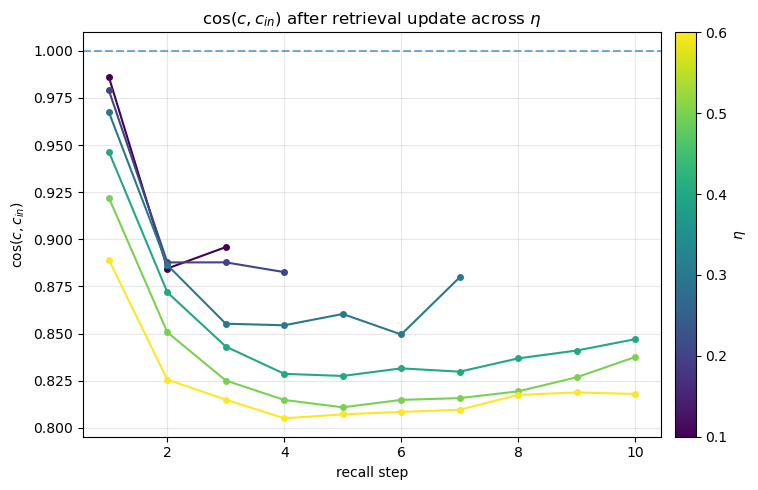

In [25]:
plot_cosine_similarity_sweep(sweep_eta, eta_grid, param_name=r"$\eta$")

#### Mean $f_{in}(i)$ by serial position

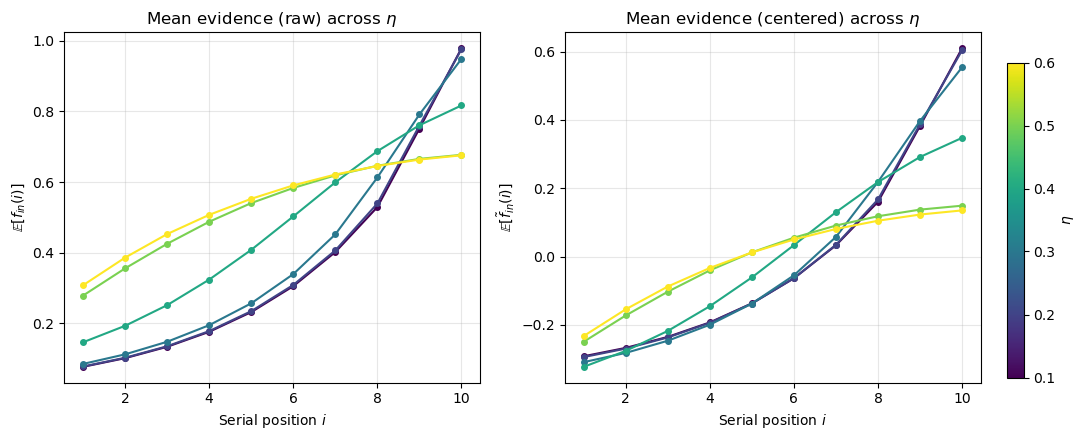

In [26]:
plot_mean_evidence_by_pos(sweep_eta, eta_grid, param_name=r"$\eta$")

#### Neighbor item-evidence asymmetry during selection

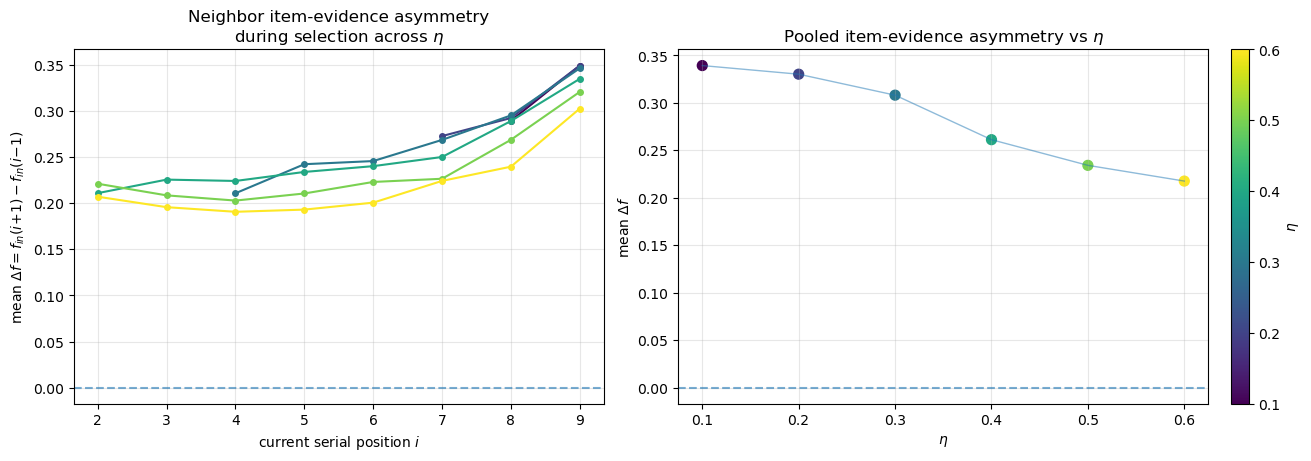

In [27]:
plot_item_evidence_asymmetry_paired(sweep_eta, eta_grid, param_name=r"$\eta$")

#### Neighbor context-to-item-input alignment ($\Delta_{FC}$) asymmetry during updating

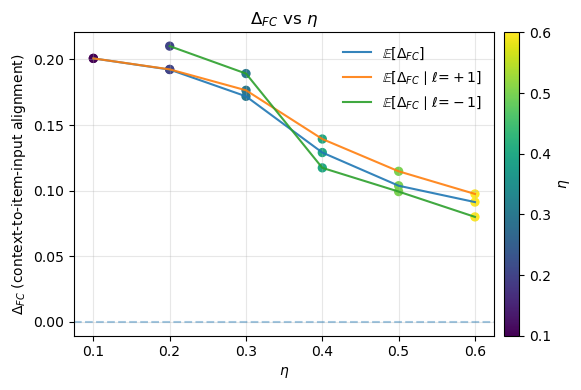

In [28]:
m_all, m_fwd, m_bwd = fc_alignment_asymmetry_means(sweep_eta, eta_grid)
colors, norm_c, cmap_c = make_sweep_colors(eta_grid, "viridis")

fig, ax = plt.subplots(figsize=(6, 4))
plot_fc_alignment_asymmetry_curves(
    ax, eta_grid, m_all, m_fwd, m_bwd, colors,
    title=r"$\Delta_{FC}$ vs $\eta$", xlabel=r"$\eta$")
sm = mpl.cm.ScalarMappable(norm=norm_c, cmap=cmap_c); sm.set_array([])
fig.colorbar(sm, ax=ax, pad=0.02).set_label(r"$\eta$")
plt.tight_layout(); plt.show()

---
## 4. Sweep global encoding drift scale $B_{enc}$

In [29]:
sweep_B_enc_scale = sweep_one_param(
    param_name="B_encD_scale",
    param_grid=B_encD_scale_grid,
    base_params=BASE_PARAMS,
    n_sims=n_sims,
    collect_diagnostics=True,
    recency_k=3,
)

  B_encD_scale=0.2  done
  B_encD_scale=0.4  done
  B_encD_scale=0.6  done
  B_encD_scale=0.8  done
  B_encD_scale=1  done


### Mandatory Behavioral Readouts

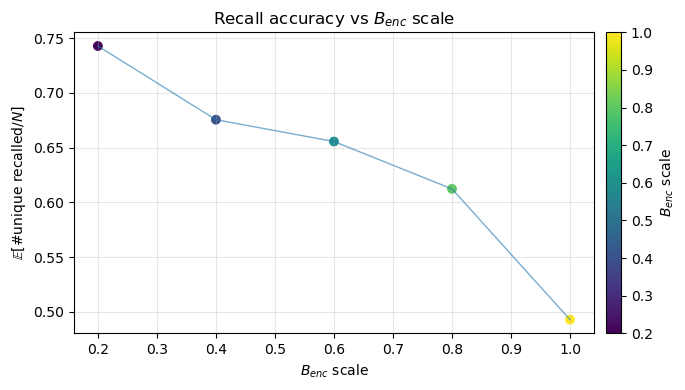

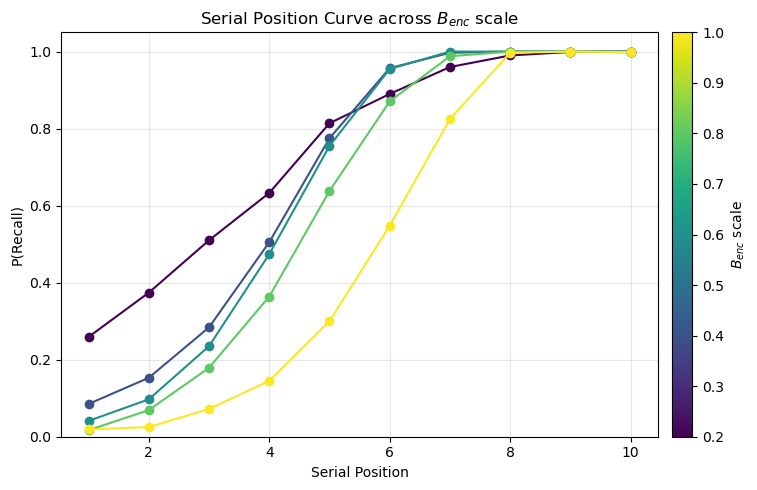

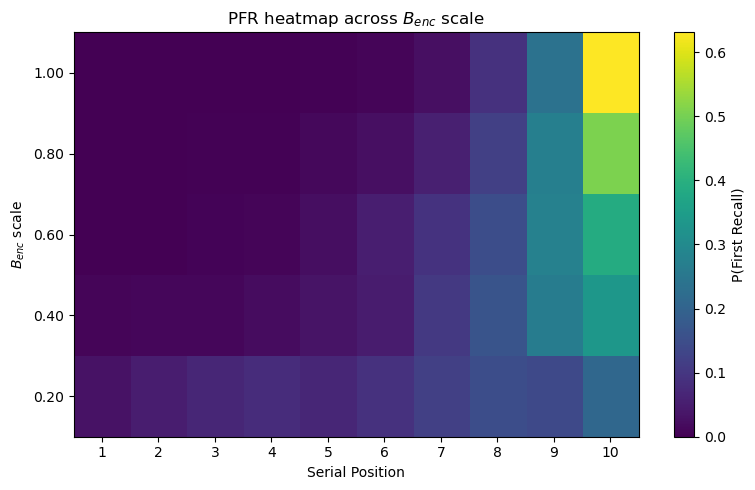

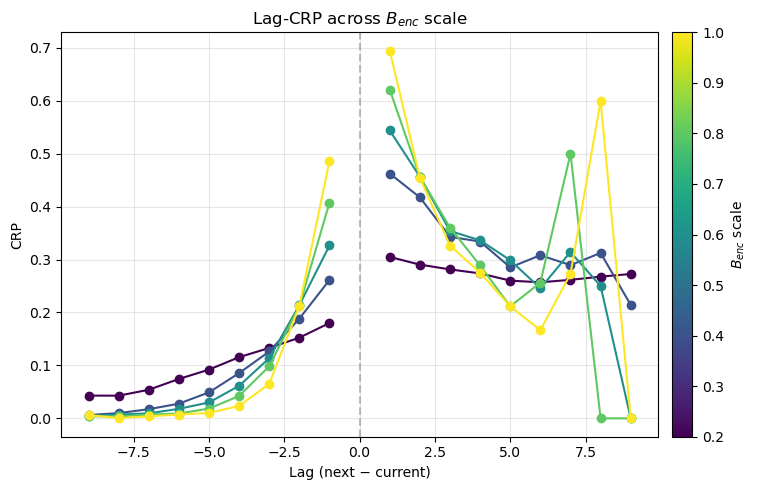

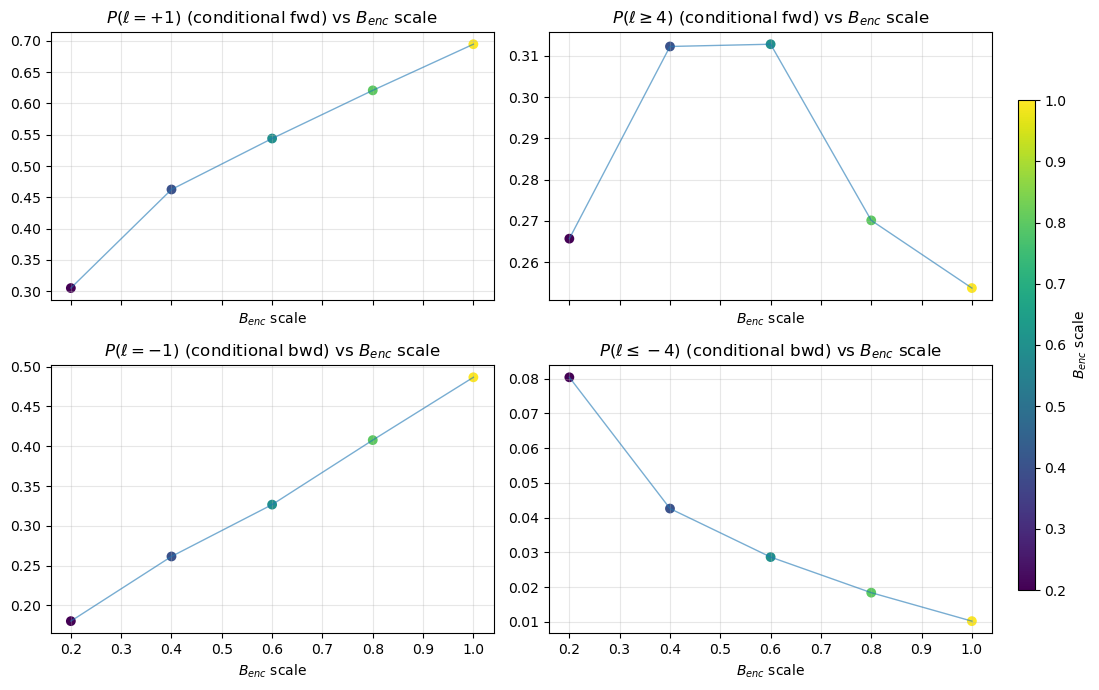

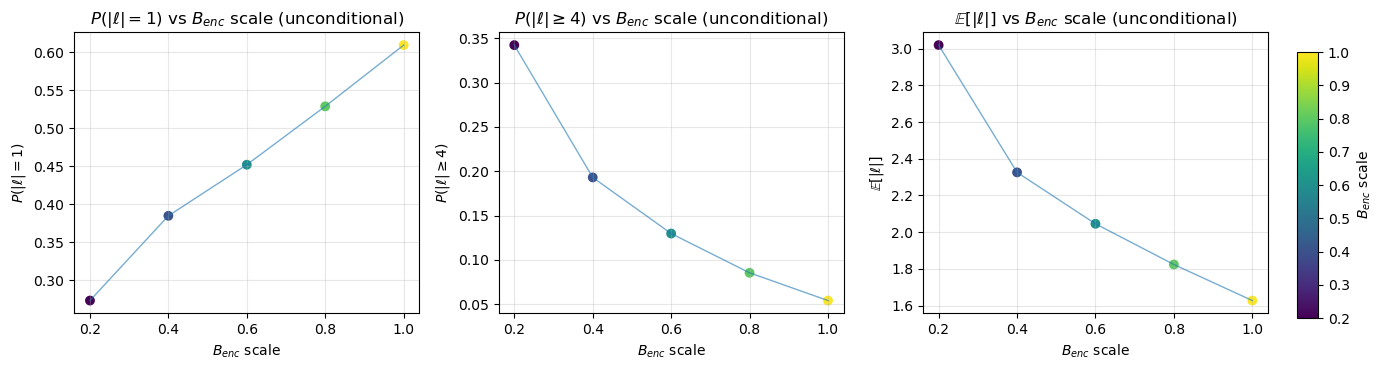

In [30]:
plot_all_behavioral_readouts(sweep_B_enc_scale, B_encD_scale_grid, r"$B_{enc}$ scale")

### Model Internal Diagnostics ($B_{enc}$ scale)

Encoding strength — most informative internals are matrix magnitude
(does scaling actually change stored association strength?), evidence
profiles, neighbor asymmetries, and recall truncation.

#### $M_{FC}$ norms

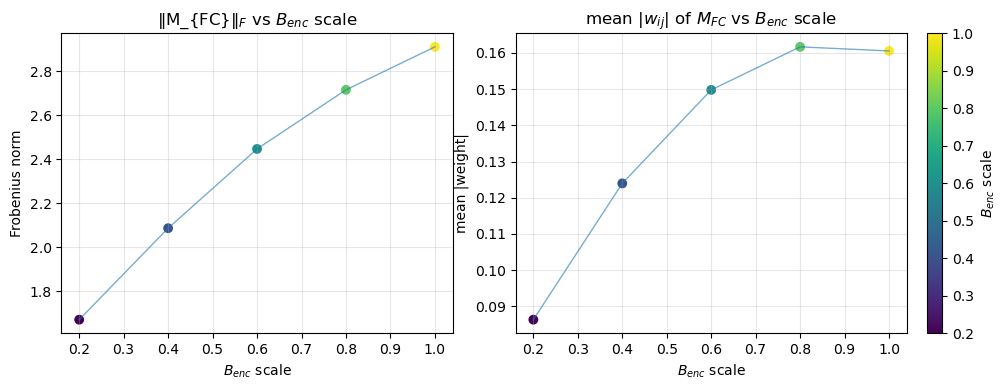

In [31]:
plot_matrix_norms_sweep(sweep_B_enc_scale, B_encD_scale_grid, r"$B_{enc}$ scale", matrix_key="net_w_fc")

#### $M_{CF}$ norms

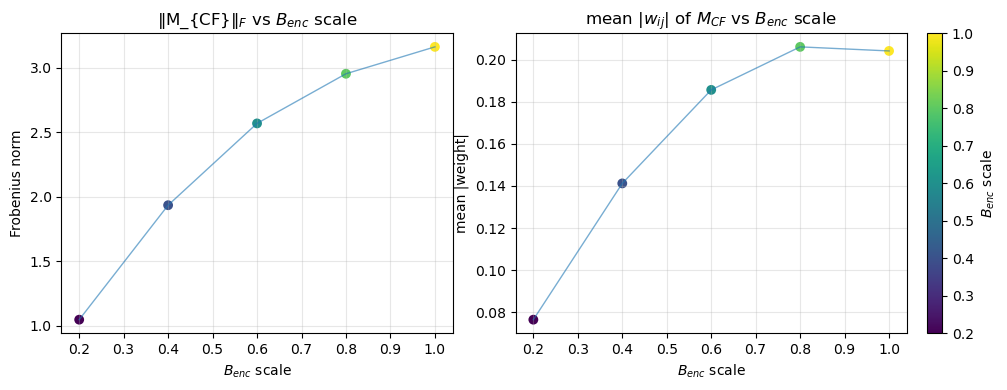

In [32]:
plot_matrix_norms_sweep(sweep_B_enc_scale, B_encD_scale_grid, r"$B_{enc}$ scale", matrix_key="net_w_cf")

#### $M_{FC}$ band-strength profile

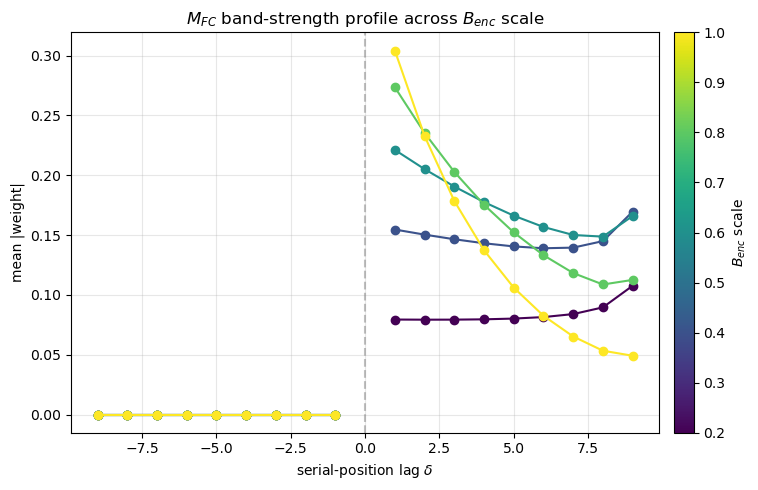

In [33]:
plot_matrix_band_profiles(sweep_B_enc_scale, B_encD_scale_grid, r"$B_{enc}$ scale", matrix_key="net_w_fc")

#### $M_{FC}$ neighbor-band asymmetry

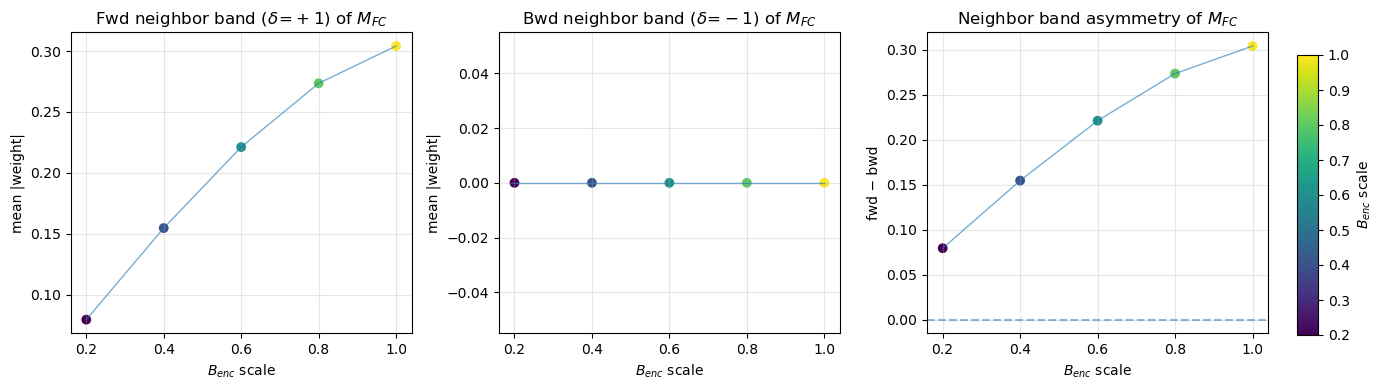

In [34]:
plot_neighbor_band_asymmetry_sweep(sweep_B_enc_scale, B_encD_scale_grid, r"$B_{enc}$ scale", matrix_key="net_w_fc")

#### Mean $f_{in}(i)$ by serial position

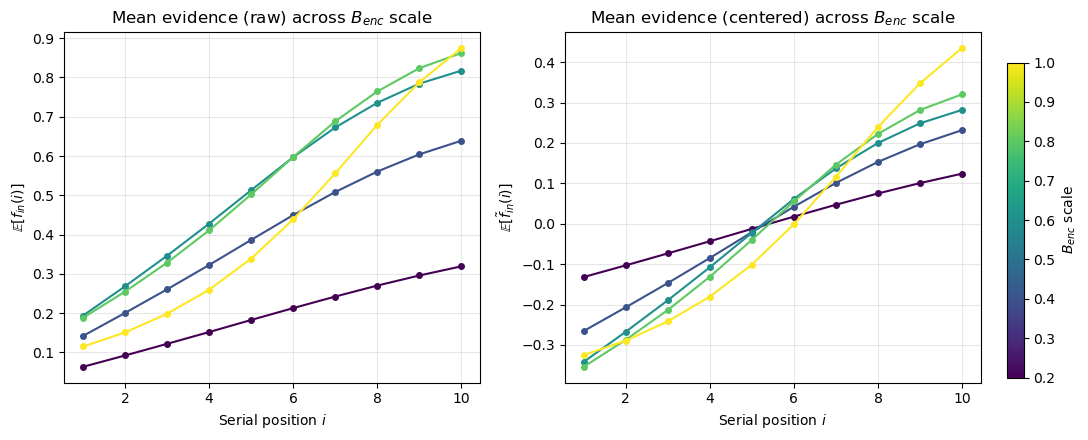

In [35]:
plot_mean_evidence_by_pos(sweep_B_enc_scale, B_encD_scale_grid, param_name=r"$B_{enc}$ scale")

#### Neighbor item-evidence asymmetry during selection

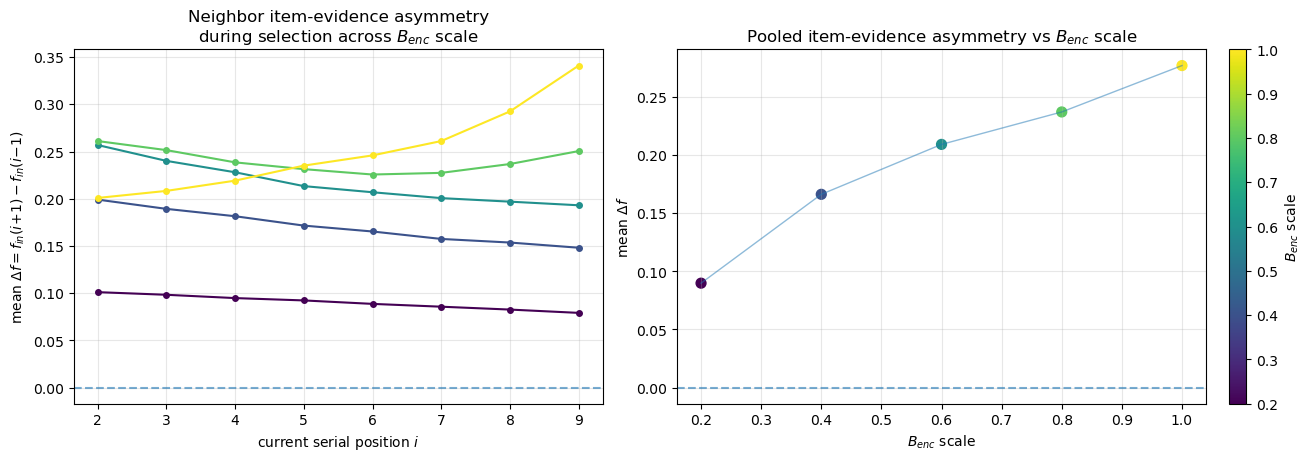

In [36]:
plot_item_evidence_asymmetry_paired(sweep_B_enc_scale, B_encD_scale_grid, param_name=r"$B_{enc}$ scale")

#### Neighbor context-to-item-input alignment ($\Delta_{FC}$) asymmetry during updating

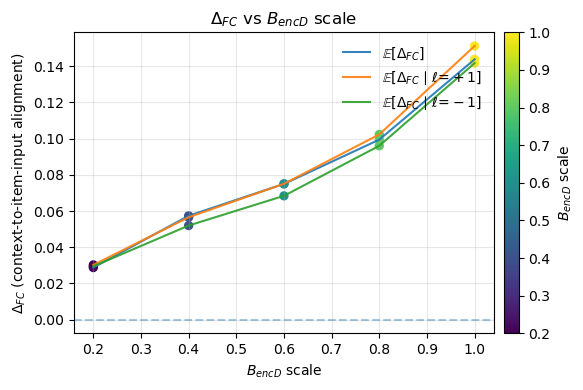

In [37]:
m_all, m_fwd, m_bwd = fc_alignment_asymmetry_means(sweep_B_enc_scale, B_encD_scale_grid)
colors, norm_c, cmap_c = make_sweep_colors(B_encD_scale_grid, "viridis")

fig, ax = plt.subplots(figsize=(6, 4))
plot_fc_alignment_asymmetry_curves(
    ax, B_encD_scale_grid, m_all, m_fwd, m_bwd, colors,
    title=r"$\Delta_{FC}$ vs $B_{encD}$ scale", xlabel=r"$B_{encD}$ scale")
sm = mpl.cm.ScalarMappable(norm=norm_c, cmap=cmap_c); sm.set_array([])
fig.colorbar(sm, ax=ax, pad=0.02).set_label(r"$B_{encD}$ scale")
plt.tight_layout(); plt.show()

#### Cosine similarity $\cos(c, c_{in})$ after update

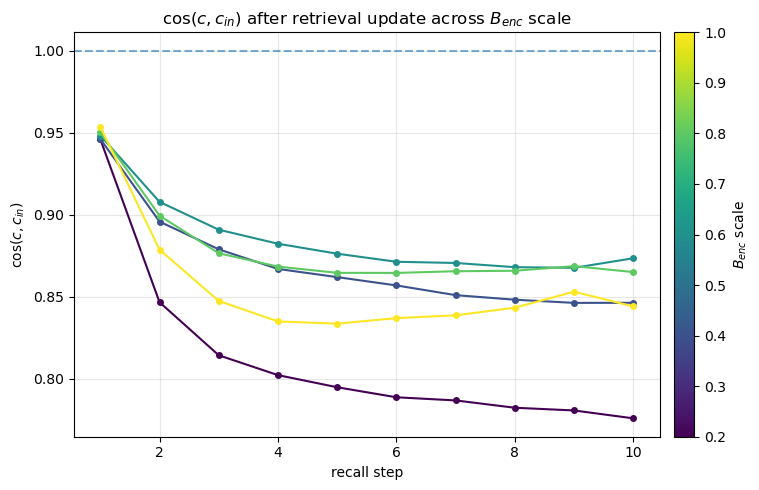

In [38]:
plot_cosine_similarity_sweep(sweep_B_enc_scale, B_encD_scale_grid, param_name=r"$B_{enc}$ scale")

#### Mean items recalled per trial

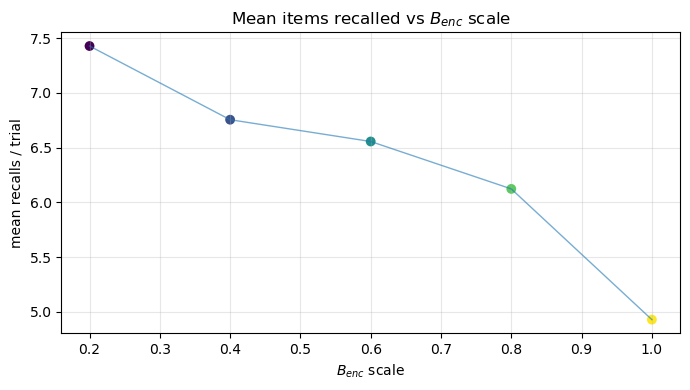

In [39]:
from cmr.diagnostics_encoding import sweep_recall_counts

counts = sweep_recall_counts(sweep_B_enc_scale, B_encD_scale_grid)
colors, norm_c, cmap_c = make_sweep_colors(B_encD_scale_grid, "viridis")
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(B_encD_scale_grid, counts, lw=1, alpha=0.6)
ax.scatter(B_encD_scale_grid, counts, c=colors, s=50, edgecolor='none')
ax.set_title(r"Mean items recalled vs $B_{enc}$ scale")
ax.set_xlabel(r"$B_{enc}$ scale"); ax.set_ylabel("mean recalls / trial")
ax.grid(alpha=0.3); fig.tight_layout(); plt.show()

---
## To Sweep a New Parameter

```python
# 1. Add to BASE_PARAMS if needed
# 2. Define grid
my_grid = [0.1, 0.2, 0.3]

# 3. Run sweep
sweep_X = sweep_one_param("my_param", my_grid, BASE_PARAMS, n_sims=n_sims)

# 4. Mandatory behavioral readouts (always)
plot_all_behavioral_readouts(sweep_X, my_grid, r"$X$")

# 5. Parameter-specific diagnostics (choose relevant ones)
plot_item_evidence_asymmetry_paired(sweep_X, my_grid, r"$X$")
plot_fc_alignment_asymmetry_sweep(sweep_X, my_grid, r"$X$")
plot_mean_evidence_by_pos(sweep_X, my_grid, r"$X$")
# etc.
```